In [1]:
%matplotlib inline  
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pandas_datareader.iex.daily import IEXDailyReader
import pandas as pd
import datetime as dt
IEX_token='sk_50446876d4364cc8b218b298207a8e8f'
# symbols = ['GM', 'TSLA','AAPL', 'GOOG', 'MSFT','ZNGA', 'VIXY', 'SPY']
symbols = ['GM', 'TSLA']
start = dt.datetime(2017, 5, 4)
end = dt.datetime(2020, 3, 31)
# get OHLCV from iex (no more yahoo or google stock prices anymore)
# Idiosyncrasy of DataReader is that the top level of column labels is OHLCV, and second level is TICKER
# .iex.daily.IEXDailyReader
# d=web.DataReader("AAPL",'iex',start, api_key=IEX_token)
# d=web.DataReader("AAPL", 'iex', start=start, end=end, access_key=IEX_token)
# web.IEXDailyReader()
# web.pandas_datareader.
dr=IEXDailyReader(symbols,start=start,end=end, api_key=IEX_token)
d=dr.read()

Populating the interactive namespace from numpy and matplotlib


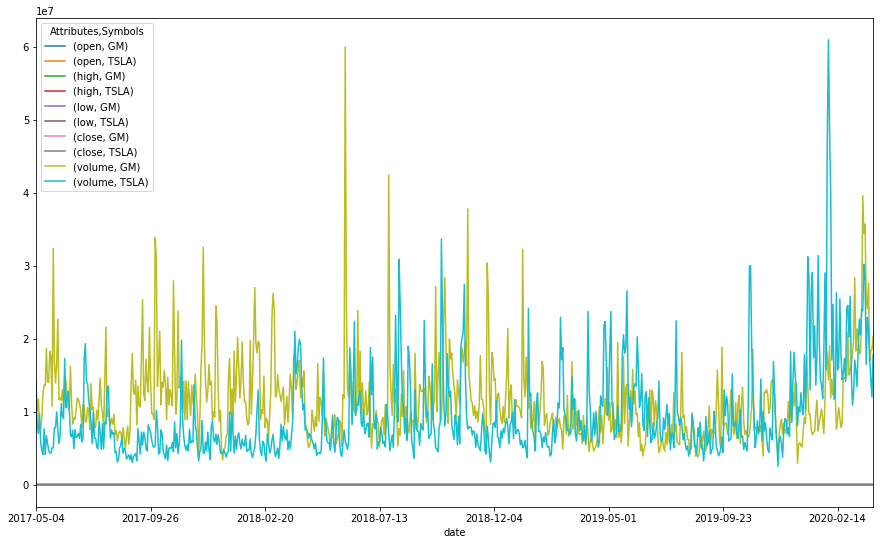

In [3]:
%matplotlib inline  
%pylab inline
import datetime as dt
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 9]
dt.date.today()
d.plot()

In [4]:
idx = pd.IndexSlice
d.columns
# swap 1st 2 levels of column labels so OHLCV the SECOND level of column labels is OHLCV, and FIRST level is TICKER
d.swaplevel(0,1,axis=1)


Symbols,GM,TSLA,GM,TSLA,GM,TSLA,GM,TSLA,GM,TSLA
Attributes,open,open,high,high,low,low,close,close,volume,volume
date,,,,,,,,,,
2017-05-04,33.65,307.44,33.67,307.77,32.97,290.76,33.15,295.46,12464382,14152008
2017-05-05,33.30,298.00,33.77,308.55,33.20,296.80,33.77,308.35,10145923,8177347
2017-05-08,33.85,310.90,34.25,313.79,33.80,305.82,33.97,307.19,11736544,7006471
2017-05-09,33.90,309.38,34.47,321.99,33.90,309.10,34.26,321.26,8434533,9676537
2017-05-10,34.25,321.56,34.46,325.50,34.08,318.12,34.23,325.22,7665286,5741607
...,...,...,...,...,...,...,...,...,...,...
2020-03-25,23.00,545.25,23.15,557.00,21.00,511.11,21.49,539.25,27617207,21222745
2020-03-26,21.64,547.39,22.97,560.00,21.06,512.25,22.56,528.16,16990666,17422082


In [5]:
# Drop a column
d.drop(labels=['volume'],axis=1)

Attributes   open           high            low          close        
Symbols        GM    TSLA     GM    TSLA     GM    TSLA     GM    TSLA
date                                                                  
2017-05-04  33.65  307.44  33.67  307.77  32.97  290.76  33.15  295.46
2017-05-05  33.30  298.00  33.77  308.55  33.20  296.80  33.77  308.35
2017-05-08  33.85  310.90  34.25  313.79  33.80  305.82  33.97  307.19
2017-05-09  33.90  309.38  34.47  321.99  33.90  309.10  34.26  321.26
2017-05-10  34.25  321.56  34.46  325.50  34.08  318.12  34.23  325.22
...           ...     ...    ...     ...    ...     ...    ...     ...
2020-03-25  23.00  545.25  23.15  557.00  21.00  511.11  21.49  539.25
2020-03-26  21.64  547.39  22.97  560.00  21.06  512.25  22.56  528.16
2020-03-27  21.37  505.00  21.96  525.80  20.74  494.03  21.38  514.36
2020-03-30  22.31  510.26  22.48  516.65  20.63  491.23  21.32  502.13
2020-03-31  20.97  501.25  22.21  542.96  20.55  497.00  20.78  524.00

[732 rows x 8 columns]

In [6]:
# Drop lower level columns ('inplace' is False so df not changed)
d.drop(labels=['GM','AAPL', 'VIXY'], axis=1, index=None, columns=None, level=1, inplace=False, errors='raise')

Attributes,open,high,low,close,volume
Symbols,TSLA,TSLA,TSLA,TSLA,TSLA
date,,,,,
2017-05-04,307.44,307.77,290.76,295.46,14152008
2017-05-05,298.00,308.55,296.80,308.35,8177347
2017-05-08,310.90,313.79,305.82,307.19,7006471
2017-05-09,309.38,321.99,309.10,321.26,9676537
2017-05-10,321.56,325.50,318.12,325.22,5741607
...,...,...,...,...,...
2020-03-25,545.25,557.00,511.11,539.25,21222745
2020-03-26,547.39,560.00,512.25,528.16,17422082


In [7]:
# help(d.columns)
mi=d.columns
d.columns

MultiIndex([(  'open',   'GM'),
            (  'open', 'TSLA'),
            (  'high',   'GM'),
            (  'high', 'TSLA'),
            (   'low',   'GM'),
            (   'low', 'TSLA'),
            ( 'close',   'GM'),
            ( 'close', 'TSLA'),
            ('volume',   'GM'),
            ('volume', 'TSLA')],
           names=['Attributes', 'Symbols'])

In [ ]:
mi.get_loc_level('GM',1)

In [ ]:
# d['date'] = pd.to_datetime(d['date'])
d.describe()

In [ ]:
# Use Boolean filting ('mask') and count - kewl:)
d[d['volume']>=1000000].count()

In [ ]:
# Use Boolean filting ('mask') and count - kewl:)
d[d['high']>=d['low']*1.1].count()

In [ ]:
# Calculate daily log returns
rets=log(d/d.shift(1))
rets

In [ ]:
(d['close']['GM'].rolling(window=20).mean()-d['close']['GM']).plot(grid=True, style=['red'])
d.index

In [ ]:
# Calculate rolling/moving standard deviation over a window and plot
rets['close']['GM'].rolling(window=20).std().plot(grid=True, style=['blue'])

In [ ]:
# Now swap the column label levels permanently
d.columns = d.columns.swaplevel(0, 1)
d.sort_index(1, inplace=True)
d.columns

In [ ]:
# d.drop(labels=['volume'], axis=1,inplace=True)
d

In [ ]:
import matplotlib.pyplot as plt, pylab as lab
A=np.array([[0,.003],[1,1.1],[2,2.5],[3,3.29]])
m,b=lab.polyfit(A[:,0],A[:,1],1)
m,b
plt.grid(axis='both')
plt.scatter(A[:,0],A[:,1])
plt.plot(A[:,0], m*A[:,0]+b)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates, ticker
import matplotlib as mpl
import mpl_finance as fin
from mpl_finance import candlestick_ohlc 

In [ ]:
# OMG this was painful ... but instructive. I wanted to get 
# d=d.drop(labels=['volume'],axis=1, level=1)
# d = d.drop('index', 1)
k=d.index.tolist()
# l=d['GM'].apply(tuple, axis=1).tolist()
# Below reset_index causes index (timestamps as strings) to become ordinary column
f=d['GM'].reset_index()
# This applies(in map-style) function to convert time string in (new)'date' column
f['date'] = f['date'].apply(lambda x : dt.datetime.strptime(x, "%Y-%m-%d").toordinal())
# f.apply(tuple, axis=1).tolist()
# filt=d.iloc[:, 0:4]
# f=filt.reset_index(inplace=True)
type(f.iloc[1,0])
f

In [ ]:
f.date

In [ ]:
f.index
f['Timestamp']=f['date']
f = f.set_index(['Timestamp'])
f.index = pd.to_datetime(f.index)
f.resample('M')
f

In [ ]:
import datetime as dt
t=dt.datetime.strptime("30Nov00", "%d%b%y")
now=dt.datetime.now()
now.toordinal()


In [ ]:
# candlestick2_ohlc takes individual parameters for O, H, L C lists
from mpl_finance import candlestick_ohlc
fig, ax1 = plt.subplots()
# fin.candlestick2_ohlc(ax1, d['open']['GM'], d['high']['GM'], d['low']['GM'], d['close']['GM'], width=4, colorup='g', colordown='r', alpha=0.75)
# fin.candlestick2_ohlc(ax1, d['open'], d['high'], d['low'], d['close'], width=4, colorup='g', colordown='r', alpha=0.75)
d
# nd=d['GM'].values
# print(nd.shape)
candlestick_ohlc(ax1, f.values)
plt.show()
f
#
# 
# fin.candlestick2_ohlc(ax1,d['GM'].values)

In [ ]:
d.index

In [ ]:
# candlestick2_ohlc takes individual parameters for O, H, L C lists
import io
import datetime as dt
from pandas_datareader.iex.daily import IEXDailyReader
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
from matplotlib.dates import date2num, DayLocator, MonthLocator, DateFormatter
import pandas as pd

symbols = ['GM', 'IBM', 'TSLA','AAPL', 'GOOG', 'MSFT','ZNGA', 'VIXY']
start = dt.datetime(2017, 9, 10)
end = dt.datetime(2018, 8, 25)
dr=IEXDailyReader(symbols,start=start,end=end, api_key=IEX_token)
d=dr.read()

# Now swap the column label levels permanently
d.columns = d.columns.swaplevel(0, 1)
d.sort_index(1, inplace=True)

dd=d['GM'].reset_index()
dd['date'] = date2num(pd.to_datetime(dd['date']).tolist())

plt.rcParams['figure.figsize'] = [15, 9]
fig, ax=plt.subplots()
candlestick_ohlc(ax, dd.values,colorup='green', colordown='red')
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%d-%b-%y'))
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Now try to re-sample (down-sample) from daily to monthly, and to synthesise OHLC
d.index = pd.to_datetime(d.index)
dw=d['GM']
# Create new df for resample - 'M' Monthly but also intra-day, quarterly, weekly etc.
dx=pd.DataFrame()
dx['Open']=dw['open'].resample('M').first()
dx['High']=dw['high'].resample('M').max()
dx['Low'] =dw['low'].resample('M').min()
dx['Close']=dw['close'].resample('M').last()

# print(dx)
dx=dx.reset_index()
dx['date'] = date2num(pd.to_datetime(dx['date']).tolist())

plt.rcParams['figure.figsize'] = [15, 9]
fig, ax=plt.subplots()
candlestick_ohlc(ax, dx.values,width=4,colorup='green', colordown='red')
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%d%b%y'))
plt.xticks(rotation=45)
plt.show()

In [ ]:
dx.first()

In [ ]:
d['GM']['close'].max()

In [ ]:
d[where d['']]

In [ ]:
from pandas_datareader.iex.daily import IEXDailyReader
import pandas as pd
import datetime as dt
IEX_token='sk_50446876d4364cc8b218b298207a8e8f'
# symbols = ['GM', 'TSLA','AAPL', 'GOOG', 'MSFT','ZNGA', 'VIXY', 'SPY']
symbols = ['DCOILWTICO']

start = dt.datetime(2017, 5, 4)
end = dt.datetime(2019, 8, 25)
# get OHLCV from iex (no more yahoo or google stock prices anymore)
# Idiosyncrasy of DataReader is that the top level of column labels is OHLCV, and second level is TICKER
# .iex.daily.IEXDailyReader
# d=web.DataReader("AAPL",'iex',start, api_key=IEX_token)
# d=web.DataReader("AAPL", 'iex', start=start, end=end, access_key=IEX_token)
# web.IEXDailyReader()
# web.pandas_datareader.
dr=IEXDailyReader('DCOILWTICO',start=start,end=end, api_key=IEX_token)
d=dr.read()